<a href="https://colab.research.google.com/github/aldisstar/Taller-MIT/blob/main/W1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Assignment

## Feature Engineering

### Step 1 Imports and Setup

We will be working with some data from Kaggle - a machine learning competition site with many datasets: https://www.kaggle.com/c/stumbleupon/data?select=train.tsv.

The dataset here contains information about webpages and the labels are whether or not the site is evergreen. Remember, an evergreen site is one that is always relevant. A news article from 1998 would not be evergreen, but a chocolate chip cookie recipe would be.  The labels were determined by human judgement.

In [ ]:
# ==============================================
# 0. Copy data
# ==============================================

# Remove any existing folder
!rm -rf gsl-uruguay

In [ ]:
# Copy over data from github
%%bash
git clone https://github.com/caboonie/gsl-uruguay.git

Cloning into 'gsl-uruguay'...
Updating files: 100% (5869/5869), done.


In [ ]:
# ==============================================
# 1. Module imports
# ==============================================

# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as st

# plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl

# scaling
from sklearn.preprocessing import StandardScaler

# classification algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# dimension reduction
from sklearn.decomposition import PCA

# cross-validation
from sklearn.model_selection import train_test_split

# model evaluation
from sklearn.metrics import roc_auc_score

# text mining
import re
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection

# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy


import warnings
warnings.filterwarnings("ignore")

### Step 2 Explore the dataset

Each row of the table is a datapoint and each column represents a feature. We can check the shape of the data to see how many datapoints and features we have. Note, there are a lot of features in this dataset, but we will mostly focus on these ones:
1. **alchemy_category_score** - the score of how likely the alchemy category is correct, from 0 to 1.
2. **alchemy_category** - type of page, such as "health", "sports", etc.
3. **linkwordscore** - Percentage of words on the page that are in links
4. **news_front_page** - 0 or 1 representing whether this webpage is front-page news
5. **boilerplate** - the html text of the webpage
6. **spelling_errors_ratio** - Percentage of words that are mispelled.
7. **numberOfLinks** - number of links in the page
8. **numwords_in_url** - number of words in the url link

You can see descriptions of each feature here: https://www.kaggle.com/c/stumbleupon/data?select=train.tsv


In [ ]:
# ==============================================
# 2. Data loading and explore
# ==============================================

# load the data as a pandas dataframe
dataset = pd.read_table("gsl-uruguay/content/w1d2/train.tsv", sep= "\t")
print("Data dimensions:" + str(dataset.shape))
# we will narrow our focus to only the 9 features listed above
dataset = dataset.filter(["alchemy_category_score", "alchemy_category", "linkwordscore", "news_front_page", "boilerplate",
                          "spelling_errors_ratio", "numberOfLinks", "numwords_in_url", "label"])
# display the first 10 lines
display(dataset.head(10))

Data dimensions:(7395, 27)


,alchemy_category_score,alchemy_category,linkwordscore,news_front_page,boilerplate,spelling_errors_ratio,numberOfLinks,numwords_in_url,label
0,0.789131,business,24,0,"{""title"":""IBM Sees Holographic Calls Air Breat...",0.079130,170,8,0
1,0.574147,recreation,40,0,"{""title"":""The Fully Electronic Futuristic Star...",0.125448,187,9,1
2,0.996526,health,55,0,"{""title"":""Fruits that Fight the Flu fruits tha...",0.057613,258,11,1
3,0.801248,health,24,0,"{""title"":""10 Foolproof Tips for Better Sleep ""...",0.100858,120,5,1
4,0.719157,sports,14,0,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",0.082569,162,10,0
5,?,?,12,?,"{""url"":""conveniencemedical genital herpes home...",0.087356,55,3,0
6,0.22111,arts_entertainment,21,0,"{""title"":""fashion lane American Wild Child "",""...",0.064327,93,3,1
7,?,?,5,?,"{""url"":""insidershealth article racing for reco...",0.148551,132,4,0
8,?,?,17,0,"{""title"":""Valet The Handbook 31 Days 31 days"",...",0.125000,194,7,1
9,?,?,14,?,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",0.094412,326,4,1


#### **Exercise 1**
Complete all formatting and type casting. We will need to:
* Format missing values in the dataset
* Convert `news_front_page` and `alchemy_category_score` from objects to floats

Confirm that data types are correct for each feature.

*Hint: missing data is not the same as null data*

In [ ]:
# Replace "?" with NaN
dataset.replace("?", np.nan, inplace=True)

# Convert 'news_front_page' and 'alchemy_category_score' to floats
dataset['news_front_page'] = dataset['news_front_page'].astype(float)
dataset['alchemy_category_score'] = dataset['alchemy_category_score'].astype(float)

# Confirm data types
print(dataset.dtypes)

# Display the first 10 lines
print(dataset.head(10))

alchemy_category_score    float64
alchemy_category           object
linkwordscore               int64
news_front_page           float64
boilerplate                object
spelling_errors_ratio     float64
numberOfLinks               int64
numwords_in_url             int64
label                       int64
dtype: object
   alchemy_category_score    alchemy_category  linkwordscore  news_front_page  \
0                0.789131            business             24              0.0   
1                0.574147          recreation             40              0.0   
2                0.996526              health             55              0.0   
3                0.801248              health             24              0.0   
4                0.719157              sports             14              0.0   
5                     NaN                 NaN             12              NaN   
6                0.221110  arts_entertainment             21              0.0   
7                     NaN       

In [ ]:
# Convert the 'is_news' feature to float type
dataset[["news_front_page"]] = dataset[["news_front_page"]].astype(float)

# Convert 'alchemy_categoty_score' to float type
dataset["alchemy_category_score"] = dataset["alchemy_category_score"].astype(float)

# Show the data type of each variable to confirm that all features are in the proper data format
dataset.dtypes

alchemy_category_score    float64
alchemy_category           object
linkwordscore               int64
news_front_page           float64
boilerplate                object
spelling_errors_ratio     float64
numberOfLinks               int64
numwords_in_url             int64
label                       int64
dtype: object

### Step 3 - Visualizing Data

Next, we will explore some aspects of the data using pandas methods.

We can analyze the number of each label for different values of each feature. For example, the frequency table below will tell us how many True and False labels there are for each category of alchemy_category.

We can also plot the same information.

#### **Exercise 2**
Using crosstab tables & plots like we did in class, form a hypothesis of which variables you think will be most important to our prediction.

In [ ]:
dataset['alchemy_category_score'].head()

0    0.789131
1    0.574147
2    0.996526
3    0.801248
4    0.719157
Name: alchemy_category_score, dtype: float64

<Axes: xlabel='alchemy_category'>

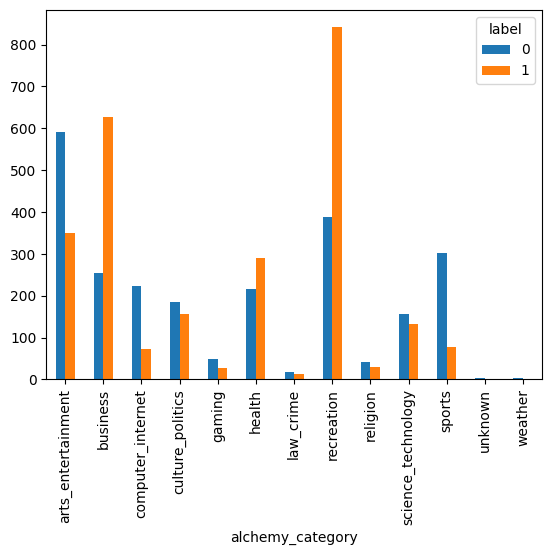

In [ ]:
# ==============================================
# 3. Understanding variables
# ==============================================

# =============================
# 3.1 alchemy_category
# =============================

# Frequency table for how many datapoints have a specific category and label
pd.crosstab(dataset["alchemy_category"], dataset["label"])

# a plot of the table above
pd.crosstab(dataset.alchemy_category, dataset.label).plot(kind="bar")

<Axes: xlabel='alchemy_category_score'>

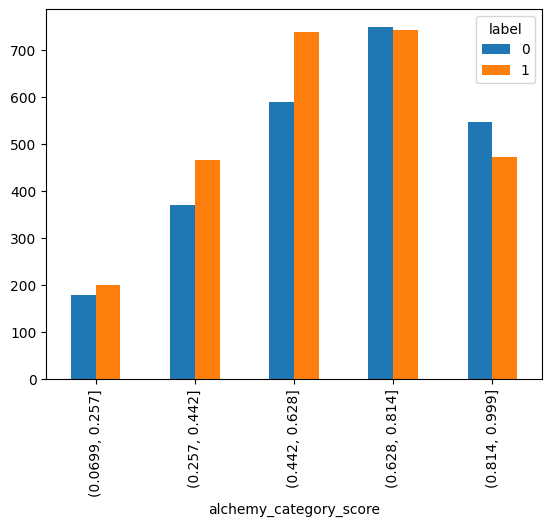

In [ ]:
# For numerical variables, we can bin the amounts and check frequency of labels within each bin
pd.crosstab(pd.cut(dataset["alchemy_category_score"], bins = 5), dataset.label).plot(kind = "bar")

<Axes: xlabel='linkwordscore'>

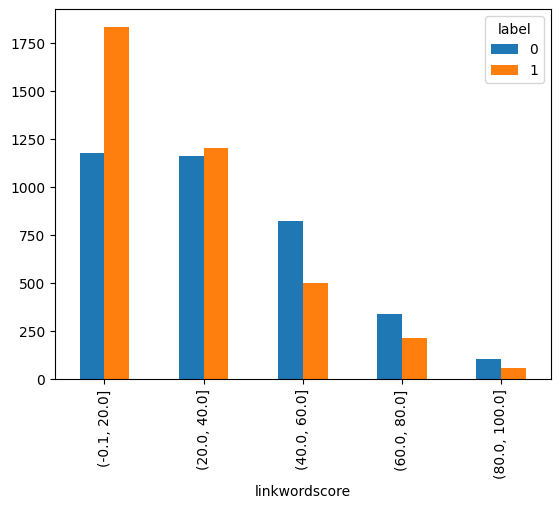

In [ ]:
# TODO: use this space to create any additional data visualizations
# For numerical variables, we can bin the amounts and check frequency of labels within each bin
pd.crosstab(pd.cut(dataset["linkwordscore"], bins = 5), dataset.label).plot(kind = "bar")

**Which variables do you expect to be most important for predicting whether or not a site is evergreen?**

Determining the importance of variables for predicting whether a site is evergreen can be done through feature importance analysis, correlation analysis. However, without conducting specific analyses, if I have to say for intuition: alchemy_category_score. This score indicates the likelihood of the alchemy category being correct

### Step 6 - Missing Values

Use what we learned in class to replace missing values in the dataset. Ensure features are the correct data type first to prevent errors.

In [ ]:
# ==========================================
# 6. Feature engineering
# ==========================================
print(np.sum(dataset.isnull()))

alchemy_category_score    2342
alchemy_category          2342
linkwordscore                0
news_front_page           1248
boilerplate                  0
spelling_errors_ratio        0
numberOfLinks                0
numwords_in_url              0
label                        0
dtype: int64


In [ ]:
# This code block checks to make sure that you have converted the feature to numerical type
if dataset["alchemy_category_score"].dtype != np.float64:
  print("Make sure to convert alchemy_category_score to a float first! Right now it is", dataset["alchemy_category_score"].dtype)

# replace missing values with the average of that feature
dataset["alchemy_category_score"] = dataset["alchemy_category_score"].fillna(np.mean(dataset["alchemy_category_score"]))

#### **Exercise 3**

Replace the missing values with the mode, or most common value for the news_front_page feature. If you're unsure of how to fill in missing data with a value, look at the example where we replaced missing values with the mean using fillna.

*Hint: scipy.stats has a function for finding the mode of a list*

In [ ]:
# TODO - replace the missing values in "news_front_page" in the dataframe with the mode
import statistics as st

mode_value = st.mode(dataset["news_front_page"])
dataset["news_front_page"].fillna(mode_value, inplace=True)

# Confirm that missing values have been replaced
print(dataset['news_front_page'].isnull().sum())



0


### Step 7 - Categorical Data

Representing categorical data is typical done by making **one-hot features**. Create a one-hot representation for each categorical feature in the dataset as required, and as reasonable.

In [ ]:
# First let's examing the alchemy_category again.
print(dataset["alchemy_category"].value_counts())

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64


In [ ]:
# As we can see here, there are some missing values in this feature:
print(np.sum(dataset["alchemy_category"].isnull()))

2342


In [ ]:
# We'll replace them with the filler category, "_M" to represent missing
dataset["alchemy_category"] = dataset["alchemy_category"].fillna("_M")

In [ ]:
# We'll now create a one-hot column for each category
alch_dataset = pd.get_dummies(dataset["alchemy_category"], prefix= "category")
alch_dataset.head(5)

,category__M,category_arts_entertainment,category_business,category_computer_internet,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_unknown,category_weather
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Merge the one-hot features with the original dataset
dataset = dataset.join(alch_dataset)
dataset.shape

(7395, 23)

### Step 8 - Text Processing
Features like "boilerplate" are arbitrary text.

To turn text into a numerical encoding, we will first try a method similar to one-hot encoding. We will find the 100 most common words in the training set for the "boilerplate" feature. Then we make a new feature column for each of those words whose value represents whether or not that word is in the "boilerplate" for that datapoint.

In [ ]:
# Simple text mining -- 1 if the word is in each document, else 0
string_vectorizer = CountVectorizer(min_df= 10,  max_features= 100, strip_accents= 'unicode',
                            analyzer= "word", token_pattern= r"\w{1,}", ngram_range=(1, 2),
                            binary= True)
train, test = train_test_split(dataset, test_size= 0.1, train_size= 0.9, random_state= 233)
string_vectorizer.fit(train["boilerplate"])

CountVectorizer(binary=True, max_features=100, min_df=10, ngram_range=(1, 2),
                strip_accents='unicode', token_pattern='\\w{1,}')

Let's see what these 100 most common words are:

In [ ]:
string_vectorizer.vocabulary_

{'title': 79,
 'over': 62,
 '2': 2,
 'of': 54,
 's': 64,
 'body': 16,
 'and': 11,
 '4': 4,
 'the': 70,
 'is': 40,
 'more': 48,
 'than': 68,
 'a': 6,
 'in': 36,
 'at': 14,
 '3': 3,
 'most': 49,
 'it': 42,
 'an': 10,
 'for': 24,
 'or': 59,
 'to': 80,
 'that': 69,
 'be': 15,
 '1': 0,
 '5': 5,
 'are': 12,
 'but': 17,
 'they': 76,
 'when': 90,
 'you': 97,
 'get': 28,
 'your': 99,
 'there': 74,
 'no': 52,
 'into': 39,
 'as': 13,
 'i': 33,
 'from': 26,
 'with': 94,
 'like': 45,
 'which': 91,
 'on': 56,
 'how': 32,
 'if': 34,
 'we': 87,
 'has': 29,
 'one': 58,
 'so': 65,
 'here': 31,
 'can': 19,
 'not': 53,
 'this': 77,
 'will': 93,
 'new': 51,
 'have': 30,
 'them': 72,
 'also': 9,
 'out': 61,
 't': 67,
 'then': 73,
 'url': 84,
 'in the': 38,
 'for the': 25,
 'with a': 95,
 'if you': 35,
 'it s': 43,
 'on the': 57,
 'with the': 96,
 'you can': 98,
 'is a': 41,
 'recipe': 63,
 'by': 18,
 'make': 46,
 'these': 75,
 'until': 82,
 'just': 44,
 'do': 20,
 'about': 7,
 'their': 71,
 'from the': 27,


In [ ]:
train_bow = string_vectorizer.transform(train["boilerplate"])
test_bow = string_vectorizer.transform(test["boilerplate"])

Let's see what's in this new dataset by turning it into a pandas dataframe.

#### **Exercise 4**

Is the word "your" in datapoint 0? (use code provided)

*Hint: look at the vocabulary dictionary to see which column represents "your".*

In [ ]:
train_bow_df = pd.DataFrame(train_bow.todense())
test_bow_df = pd.DataFrame(test_bow.todense())
train_bow_df.head(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99


In [ ]:
# Check if the word "your" is in datapoint 0
word_index = string_vectorizer.vocabulary_.get("your", -1)
if word_index != -1:
    is_word_in_datapoint_0 = train_bow_df.iloc[0, word_index] == 1
    print("Is the word 'your' in datapoint 0?", is_word_in_datapoint_0)
else:
    print("The word 'your' is not present in the vocabulary.")


Is the word 'your' in datapoint 0? True


Note that this new dataset only contains the frequency counts for those 100 words. But we'd also like it to have the other features we've been using too. So we will join together a dataset with all those features.

In [ ]:
feat = ["alchemy_category_score", "alchemy_category", "linkwordscore", "news_front_page", "boilerplate",
                          "spelling_errors_ratio", "numberOfLinks", "numwords_in_url"]


# string_vectors = string_vectorizer.transform(dataset["boilerplate"])
# dataset_word_vectors = pd.DataFrame(string_vectors.todense())

dataset_bow_and_feat_train = train[feat].join(pd.DataFrame(train_bow_df, index= train.index))
dataset_bow_and_feat_test = test[feat].join(pd.DataFrame(test_bow_df, index= train.index))
dataset_bow_and_feat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6655 entries, 5654 to 7143
Columns: 108 entries, alchemy_category_score to 99
dtypes: float64(103), int64(3), object(2)
memory usage: 5.8+ MB


In [ ]:
# we also need to add on the "labels" column
dataset_word_feat_label = dataset_bow_and_feat_train.join(dataset["label"])
dataset_word_feat_test_label = dataset_bow_and_feat_test.join(dataset["label"])

# # instead of writing out all of the features again in a list, we can use the column names as our feat list.
# # we exclude the label column though.
print("features:", dataset_word_feat_label.columns[:-1])

features: Index(['alchemy_category_score',       'alchemy_category',
                'linkwordscore',        'news_front_page',
                  'boilerplate',  'spelling_errors_ratio',
                'numberOfLinks',        'numwords_in_url',
                              0,                        1,
       ...
                             90,                       91,
                             92,                       93,
                             94,                       95,
                             96,                       97,
                             98,                       99],
      dtype='object', length=108)


Finally we will run our Linear Regression model!

In [ ]:
# conduct a test of your model results with these new features
feat = ["alchemy_category_score", "linkwordscore", "news_front_page",
                          "spelling_errors_ratio", "numberOfLinks", "numwords_in_url"]
# print(dataset_word_feat_label[feat])
bow_log_reg_model = LogisticRegression()
bow_log_reg_model.fit(dataset_bow_and_feat_train[feat], dataset_word_feat_label["label"])

# predict on validation data
bow_log_reg_model_val = pd.Series(bow_log_reg_model.predict_proba(dataset_bow_and_feat_test[feat])[:,1])

# auc score
print("Logistic performance: " + str(np.round(roc_auc_score(dataset_word_feat_test_label["label"], bow_log_reg_model_val.values), 5)))


Logistic performance: 0.62353


#### Inverse Document Frequency
Notice that these words are not particularly useful since we don't expect the number of "1" in a document to be indicative of whether it is evergreen. Many documents have a lot of "1" in their text.

Therefore, we will try a method that prioritizes words that are uncommon. Then we still count how many times that word appears for each datapoint. This is known as term frequency, inverse document frequency. We'll do this with 1000 words.

In [ ]:
idf_dtm = TfidfVectorizer(min_df= 10,  max_features= 1000, strip_accents= "unicode",
                          analyzer= "word", token_pattern= r"\w{1,}", ngram_range=(1, 2),
                          use_idf= 1, smooth_idf= 1, sublinear_tf= 1)
train, test = train_test_split(dataset, test_size= 0.1, train_size= 0.9, random_state= 233)
idf_dtm.fit(train["boilerplate"])

TfidfVectorizer(max_features=1000, min_df=10, ngram_range=(1, 2), smooth_idf=1,
                strip_accents='unicode', sublinear_tf=1,
                token_pattern='\\w{1,}', use_idf=1)

In [ ]:
dataset_idf_dtm = idf_dtm.transform(dataset["boilerplate"])
dataset_idf_dtm.shape

(7395, 1000)

In [ ]:
dataset_idf = pd.DataFrame(dataset_idf_dtm.todense())
dataset_idf = dataset_idf.join(dataset["label"])

Let's see what words are now used in the vocabulary! What types of words are common in this vocabulary and what kinds of sites might they relate to?

In [ ]:
idf_dtm.vocabulary_

{'title': 862,
 'over': 623,
 '2': 22,
 'of': 581,
 'world': 973,
 's': 708,
 'body': 160,
 'three': 855,
 'and': 95,
 '4': 44,
 '000': 2,
 'calories': 185,
 'the': 817,
 'is': 459,
 'times': 860,
 'more': 552,
 'than': 808,
 'a': 53,
 'long': 510,
 'in': 444,
 'at': 123,
 '3': 40,
 'most': 555,
 'delicious': 257,
 'candy': 192,
 'each': 287,
 'five': 328,
 'inch': 450,
 'it': 467,
 'makes': 527,
 'an': 94,
 'amazing': 90,
 'for': 336,
 'now': 578,
 'or': 611,
 'later': 488,
 'to': 863,
 'its': 474,
 'year': 977,
 'life': 497,
 'available': 127,
 'flavor': 330,
 'please': 657,
 'note': 576,
 'that': 810,
 'food': 333,
 'be': 140,
 '1': 5,
 '5': 47,
 'thick': 845,
 'weight': 938,
 'are': 110,
 'but': 173,
 'they': 842,
 're': 684,
 'small': 749,
 'when': 945,
 'you': 982,
 'really': 689,
 'need': 563,
 'get': 363,
 'your': 996,
 'there': 837,
 'no': 573,
 'into': 456,
 'as': 117,
 'i': 424,
 'm': 520,
 'sure': 788,
 'll': 509,
 'remember': 696,
 'from': 349,
 'with': 962,
 '0': 0,
 'dow

### Step 9 - Feature Engineering (Optional)

Come up with other features to add, in order to improve the performance of your model!

In [ ]:
# ToDo: Feature Engineering

### Step 10 - Scaling (standardization)

Standardize your features!

In [ ]:
# TODO: Standardization!
# Refer to code from Week 1 Day 2 class notebook!
from sklearn.preprocessing import StandardScaler

# Reset the index for a clean join
dataset = dataset.reset_index(drop=True)

# Define your feature list (replace 'feat' with your actual feature list)
feat_list = ["alchemy_category_score", "linkwordscore", "news_front_page",
             "spelling_errors_ratio", "numberOfLinks", "numwords_in_url"]

# Construct the scaler
std_scaler = StandardScaler()

# Scale the features
dataset_scaled_features = std_scaler.fit_transform(dataset[feat_list])

# Create a DataFrame with the scaled features
dataset_scaled = pd.DataFrame(dataset_scaled_features, columns=feat_list)

# Join the scaled features with the dependent variable
dataset_scaled = pd.concat([dataset_scaled, dataset["label"]], axis=1)

# Display the first few rows of the scaled dataset
print(dataset_scaled.head())



   alchemy_category_score  linkwordscore  news_front_page  \
0                1.056023      -0.298017        -0.203476   
1               -0.165894       0.486615        -0.203476   
2                2.234806       1.222208        -0.203476   
3                1.124893      -0.298017        -0.203476   
4                0.658308      -0.788412        -0.203476   

   spelling_errors_ratio  numberOfLinks  numwords_in_url  label  
0              -0.278840      -0.048784         0.940134      0  
1               0.305801       0.045947         1.249454      1  
2              -0.550424       0.441592         1.868095      1  
3              -0.004575      -0.327407         0.012172      1  
4              -0.235429      -0.093364         1.558775      0  


## Modeling!

### Step 11 - Model Train-Test-Split

First, we need to split our data set into separate train, validation, and test data sets. We can use a built in method from the sklearn library, `train_test_split` to accomplish this.

In [ ]:
# =============================
# 1.1 Train-val-test split
# =============================

# First we will split our dataset into a training and validation set
train, val = train_test_split(dataset, test_size= 0.5, train_size= 0.5, random_state= 234)
# Then we split our validation dataset into a validation and test data set
val, test = train_test_split(val, test_size= 0.5, train_size= 0.5, random_state= 675)

# Now we do the same for our idf text feature dataset
train_idf_dtm_pca, val_idf_dtm_pca = train_test_split(dataset_idf, test_size= 0.5, train_size= 0.5, random_state= 234)
val_idf_dtm_pca, test_idf_dtm_pca = train_test_split(val_idf_dtm_pca, test_size= 0.5, train_size= 0.5, random_state= 675)

### Step 12 - Classification/Regression

Now that we have our train, validation, and test sets, we can start modeling! We'll test out a few different types of models and compare their performance.

#### **Exercise 5**

Fit the following types of models, make predictions on the test data set and evaluate their performance using AUC as a metric:


1.   Logistic regression
2.   Gradient boosting cliassifier
3.   Random forest classifier using the none-text features
4.   Random forest classifier using the idf text features



In [ ]:
# =====================================
# Baseline Model: Logistic Regression
# =====================================
logReg = LogisticRegression()
logReg.fit(train[feat_list], train["label"])
logReg_test = logReg.predict_proba(test[feat_list])[:, 1]

# Show the AUC score for the baseline logistic regression model
print("Baseline logistic performance: " + str(np.round(roc_auc_score(test["label"], logReg_test), 5)))


Baseline logistic performance: 0.64315


In [ ]:
# =================
# GBM Classifier
# =================

gbm1 = GradientBoostingClassifier()
# TODO: fit GB Model
gbm1.fit(train[feat_list], train["label"])

gbm1_val = gbm1.predict_proba(val[feat_list])[:, 1]

# Show the AUC score for the GBM
print("Baselin GBM performance: " + str(np.round(roc_auc_score(val["label"], gbm1_val), 5)))

Baselin GBM performance: 0.68307


In [ ]:
# ==============================
# Random Forest - Base Features
# ==============================

# For the first RF model, we will train it using the base features
rf1 = RandomForestClassifier()
# TODO: fit Random Forest Model using base features
rf1.fit(train[feat_list], train["label"])

rf1_val = rf1.predict_proba(val[feat_list])[:, 1]

# Show the AUC score for the first RF model
print("RF Performance (Base Feats): " + str(np.round(roc_auc_score(val["label"], rf1_val), 5)))

RF Performance (Base Feats): 0.66649


In [ ]:
# ==============================
# Random Forest - IDF Features
# ==============================

# Now we will create another random forest using idf text features
rf2 = RandomForestClassifier()
rf2.fit(train_idf_dtm_pca.drop("label", axis=1), train_idf_dtm_pca["label"])

rf2_val = rf2.predict_proba(val_idf_dtm_pca.drop("label", axis=1))[:, 1]

# Show the AUC score for the second RF model
print("RF Performance IDF-PCA: " + str(np.round(roc_auc_score(val["label"], rf2_val), 5)))

RF Performance IDF-PCA: 0.85418


## Model Validation

### Step 13 - Validation Prep

**Run this cell before proceeding.** It will make sure you are correctly set up for the validation exercises.

In [ ]:
# RUN THIS CELL BEFORE PROCEEDING

dataset = pd.read_table("gsl-uruguay/content/w1d2/train.tsv", sep= "\t")

dataset = dataset.replace("?", np.nan)
dataset[["alchemy_category_score", "is_news", "news_front_page"]] = dataset[["alchemy_category_score",
                                                                         "is_news", "news_front_page"]].astype(float)

# ==========================================
# 1.1 Train-val-test split
# This is very important for generalizability
# ==========================================

train, val = train_test_split(dataset, test_size= 0.5, train_size= 0.5, random_state= 234)
val, test = train_test_split(val, test_size= 0.5, train_size= 0.5, random_state= 675)

       # use numeric variables with missing values imputed
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4",
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks",
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score",
        "al_cat__M", "al_cat_arts_entertainment", "al_cat_business", "al_cat_computer_internet",
        "al_cat_culture_politics", "al_cat_gaming", "al_cat_health", "al_cat_law_crime", "al_cat_recreation",
        "al_cat_religion", "al_cat_science_technology", "al_cat_sports"]

# ==============================================
# Prep for modeling
# ==============================================

## FROM DAY BEFORE YESTERDAY
#
# =============================
# 2.1 Feature Engineering
# =============================

# =============================
# 2.1.1 Variables with missing
#     values
# =============================

train["alchemy_category_score"] = train["alchemy_category_score"].fillna(np.mean(train["alchemy_category_score"]))
val["alchemy_category_score"] = val["alchemy_category_score"].fillna(np.mean(train["alchemy_category_score"]))
test["alchemy_category_score"] = test["alchemy_category_score"].fillna(np.mean(train["alchemy_category_score"]))
train["is_news"] = train["is_news"].fillna(0)
train["news_front_page"] = train["news_front_page"].fillna(2)

# =============================
# 2.1.2 Categorical variables
# =============================

# impute missing values as separate category
train["alchemy_category"] = train["alchemy_category"].fillna("_M")
val["alchemy_category"] = val["alchemy_category"].fillna("_M")
test["alchemy_category"] = test["alchemy_category"].fillna("_M")

# dummy variables for all categories
alch_train = pd.get_dummies(train["alchemy_category"], prefix= "al_cat")
alch_val = pd.get_dummies(val["alchemy_category"], prefix= "al_cat")
alch_test = pd.get_dummies(test["alchemy_category"], prefix= "al_cat")
train = train.join(alch_train)
val = val.join(alch_val)
test= test.join(alch_test)

## FROM YESTERDAY
#
#=============================
# 2.2 Text features
# =============================

# Preform TFIDF vectorization
idf_dtm = TfidfVectorizer(min_df= 10,  max_features= None, strip_accents= "unicode",
                          analyzer= "word", token_pattern= r"\w{1,}", ngram_range=(1, 2),
                          use_idf= 1, smooth_idf= 1, sublinear_tf= 1)
idf_dtm.fit(train["boilerplate"])

train_idf_dtm = idf_dtm.transform(train["boilerplate"])
val_idf_dtm = idf_dtm.transform(val["boilerplate"])
test_idf_dtm = idf_dtm.transform(test["boilerplate"])

# ==================================
# 2.2.1 Dimension reduction -- PCA
# ==================================

# Let's fit our model with 100 components
rpca = PCA(n_components = 100, random_state = 8795, svd_solver = "randomized")
rpca.fit(train_idf_dtm.toarray())

# Now we transform our dataset
train_idf_dtm_pca = rpca.transform(train_idf_dtm.toarray())
val_idf_dtm_pca = rpca.transform(val_idf_dtm.toarray())
test_idf_dtm_pca = rpca.transform(test_idf_dtm.toarray())
print(" --- ")
print(train_idf_dtm_pca.shape); print(val_idf_dtm_pca.shape); print(test_idf_dtm_pca.shape)
print(" --- ")

# Join the TFIDF-PCA features with the base features in a single dataframe for train, val and test
train_feat_combine = train[feat].join(pd.DataFrame(train_idf_dtm_pca, index= train.index))
val_feat_combine = val[feat].join(pd.DataFrame(val_idf_dtm_pca, index= val.index))
test_feat_combine = test[feat].join(pd.DataFrame(test_idf_dtm_pca, index= test.index))

 --- 
(3697, 100)
(1849, 100)
(1849, 100)
 --- 


### Step 14 - Accuracy, Precision, and Recall

NOw we will create a function that calculates various performance metrics for the Gradient Boosting Classifier, including Accuracy, Precision and Recall for the  with tf-idf as well as combined features. This function also generates generate F1 score and AUROC, which are provided for you.

***(OPTIONAL)*** Do the same for the other models that we explored: Random Forest, Ensemble Learning etc. Assess which models are better for which metric and what that means for them in terms of their False Positive vs False Negative rate.

#### **Exercise 6**

Complete the `gbm_metrics` function below. You will need to use predefined functions from the sklearn library to calculate accuracy, precision, and recall scores. Note that these have already been imported for you in Step 1 of this notebook.

In [ ]:
def gbm_metrics(train_feats, val_feats, train, val):
    """
    Calculate accuracy, precision, recall, F1 score, and AUC for a Gradient Boosting Model.

    Parameters:
    - train_feats: Features for training (DataFrame or sparse matrix)
    - val_feats: Features for validation (DataFrame or sparse matrix)
    - train: Training dataset with labels
    - val: Validation dataset with labels

    Returns:
    - List of metrics: [accuracy, precision, recall, f1, auc]
    """
    # Convert features to DataFrames if they are sparse matrices
    if isinstance(train_feats, csr_matrix):
        train_feats = pd.DataFrame(train_feats.toarray())
    if isinstance(val_feats, csr_matrix):
        val_feats = pd.DataFrame(val_feats.toarray())

    gbm = GradientBoostingClassifier()
    gbm.fit(train_feats, train["label"])

    gbm_predictions = pd.Series(gbm.predict(val_feats), name='Predicted Class')
    gbm_pred_proba = pd.Series(gbm.predict_proba(val_feats)[:, 1])

    gbm_truelabel = pd.Series(val["label"].values, name='True Class')

    acc = accuracy_score(gbm_truelabel, gbm_predictions)
    prec = precision_score(gbm_truelabel, gbm_predictions)
    recall = recall_score(gbm_truelabel, gbm_predictions)
    f1 = f1_score(gbm_truelabel, gbm_predictions)
    auc = roc_auc_score(gbm_truelabel, gbm_pred_proba)

    return [acc, prec, recall, f1, auc]


In [ ]:
print('GBM combined feats: \nAcc: %.3f, Prec: %.3f, Recall: %.3f, F1: %.3f, AUC: %.3f'%(metrics_gbm_combinedfeats[0],
                                                                                        metrics_gbm_combinedfeats[1],
                                                                                        metrics_gbm_combinedfeats[2],
                                                                                        metrics_gbm_combinedfeats[3],
                                                                                        metrics_gbm_combinedfeats[4]))

print('GBM tf-idf feats: \nAcc: %.3f, Prec: %.3f, Recall: %.3f, F1: %.3f, AUC: %.3f'%(metrics_gbm_idfdtmfeats[0],
                                                                                        metrics_gbm_idfdtmfeats[1],
                                                                                        metrics_gbm_idfdtmfeats[2],
                                                                                        metrics_gbm_idfdtmfeats[3],
                                                                                        metrics_gbm_idfdtmfeats[4]))

GBM combined feats: 
Acc: 0.804, Prec: 0.821, Recall: 0.782, F1: 0.801, AUC: 0.869
GBM tf-idf feats: 
Acc: 0.787, Prec: 0.850, Recall: 0.700, F1: 0.768, AUC: 0.851


The rest of the models are very similar to the above and the model development learned on Day 3. Practice creating similar function for other types of models to develop your understanding of the metrics calculations.

Finally, compare the different metric numbers for each of the models. Make sure when you compare the models you are comparing the different metrics in terms of False Positives vs False Negatives.

***Which of the metrics is a better represention of FP vs FN? Also what do you think about AUC?***

The Precision is a good representation of False Positives.
The Recall is a good representation of False Negatives.
The AUC provides an overall measure of model performance.
Choosing between models based on these metrics: If the cost of false positives is high, we might prioritize precision; if the cost of false negatives is high, we might prioritize recall. AUC is useful for an overall assessment of model performance.

### Step 15 - AUROC Curve

Look into the AUROC curve, related to but different from the AUROC score introduced yesterday. Plot the AUROC curve for Logistic Regression model with tf-idf features. You may do the same for other features and other models, as listed in Exercise 1. For faster generation, you may want to define a function for the same.

In [ ]:
# auc_plotting creates a ROC plot for a provided model given the following inputs:
#   * model = a model's class constructor (i.e. LinearRegression())
#   * model_name = your string name for the type of model you are testing
#   * train_feats = a dataframe containing all of the features to be used in training
#   * val_feats = a dataframe containing all of the features to be used in validation
#   * train = a dataframe contaning the basic features we used for training data, before adding in IDF/PCA features
#   * val = a dataframe contaning the basic features we used for validation data, before adding in IDF/PCA features

def auc_plotting(model, model_name, train_feats, val_feats, train, val):
  model.fit(train_feats, train["label"]) # fit logistic regression

  model_score = pd.Series(model.predict_proba(val_feats)[:,1], name = 'Predicted Scores') # make predictions with the model: 0 or 1
  model_truelabel = pd.Series(val["label"].values, name='True Class') # convert true label to series with a name
  fp_rate, tp_rate, threshold = roc_curve(model_truelabel, model_score)

  print('AUROC score for Logistic Regression: ', roc_auc_score(model_truelabel, model_score)) # show the AUC score for the model

  # plot the ROC curve
  plt.subplots(1, figsize=(5,5))
  plt.title('Receiver Operating Characteristic - %s'%model_name)
  plt.plot(fp_rate, tp_rate)
  plt.plot([0, 1], ls="--")
  plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

#### **Exercise 7**

Use the `auc_plotting` function defined above to plot the ROC curve for:


*   A logistic regression model
*   A gradient boosting classifier
*   A random forest

Use the `train_feat_combine` and `val_feat_combine` data sets for this exercise.



AUROC score for Logistic Regression:  0.6886427085454064


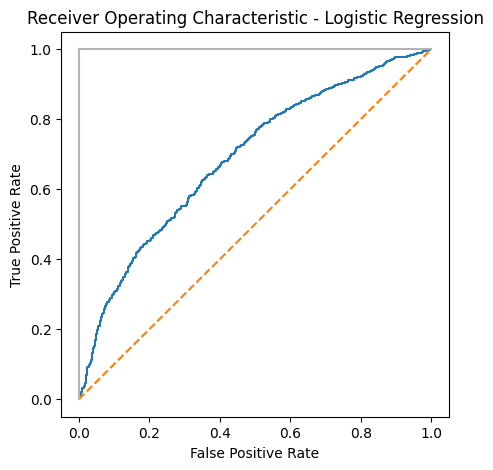

AUROC score for Logistic Regression:  0.8688481240449396


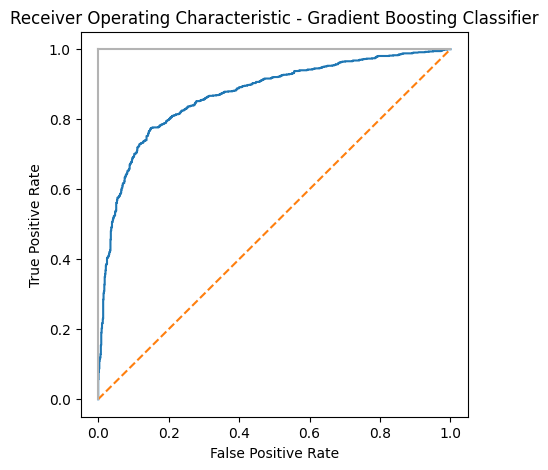

AUROC score for Logistic Regression:  0.8664073816661167


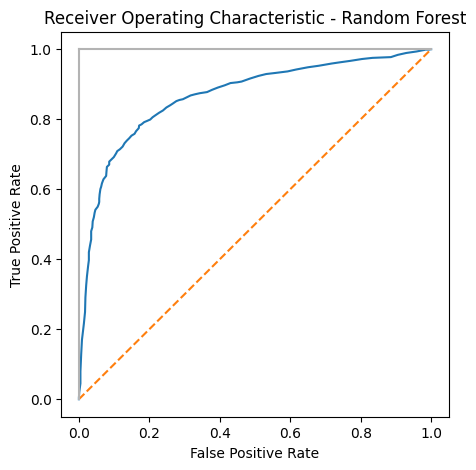

In [ ]:
# TODO: use the auc_plotting function defined above to plot an auc_roc curve for a Logistic Regression Model
# TODO: use the auc_plotting function defined above to plot an auc_roc curve for a Gradient Boosting Classifier
# TODO: use the auc_plotting function defined above to plot an auc_roc curve for a Random Forest Classifier

# Create instances of the models
logreg_model = LogisticRegression()
gbm_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier()

# Plot ROC curves for each model
auc_plotting(logreg_model, "Logistic Regression", train_feat_combine, val_feat_combine, train, val)
auc_plotting(gbm_model, "Gradient Boosting Classifier", train_feat_combine, val_feat_combine, train, val)
auc_plotting(rf_model, "Random Forest", train_feat_combine, val_feat_combine, train, val)


**Question:** Based on the curves that you plotted above, which model is the best? How do you know?

The best model can be determined based on the area under the ROC curve (AUC). The AUC provides a measure of the model's ability to distinguish between positive and negative instances.
The highest is Gradient Boosting Classifier: 0.8688